## Inspect

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_json('exps.jsonl', orient='records', lines=True)
df.head()

,commit,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.model.path,params.model.temperature,params.model.top_p,params.model.few_shot_prob,params.retriever.name,params.retriever.top_k,params.retriever.mode,params.run,metrics.exact_match,metrics.f1,metrics.supporting.precision,metrics.supporting.recall,metrics.supporting.f1
0,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,619d1b15b96898fc4b8d226eb3b577862a119ecf,cushy-expo,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-Coder-32B-Instruct,0.5,0.95,0,hybrid-tei,1,all,1,0.003333,0.067049,0.857667,0.607222,0.687653
1,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,1263fbbc3f3e1d24533b20f64d96d5d22bbedda1,cedar-tule,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-14B-Instruct,0.7,0.95,1,hybrid-tei,1,all,1,0.186667,0.277295,0.861944,0.643333,0.713526
2,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,899d0102984379466c1a642fb36315024231fd5b,snaky-gyms,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-14B-Instruct,0.3,0.95,0,hybrid-tei,2,all,1,0.143333,0.219952,0.632841,0.709444,0.647024
3,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,e5fa9f945cb4d2bd8dbde6985828848fc23c61cd,compo-arcs,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-32B-Instruct,0.5,0.95,0,hybrid-tei,2,all,1,0.146667,0.236616,0.665873,0.736389,0.680518
4,10ea60e7fecaaff5f10fb7cf5ec98211641dd509,4ff8c7f4d5821cfae0d4381f73a9104b205f5c74,zinky-jota,bdsaglam/musique-mini,answerable,validation,Qwen/Qwen2.5-32B-Instruct,0.3,0.95,0,hybrid-tei,2,all,1,0.183333,0.260552,0.662040,0.748333,0.684687


In [3]:
df['params.model.path'].unique()

array(['Qwen/Qwen2.5-Coder-32B-Instruct', 'Qwen/Qwen2.5-14B-Instruct',
       'Qwen/Qwen2.5-32B-Instruct',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-20250427_095331-merged',
       'meta-llama/Llama-3.1-70B-Instruct', 'Qwen/Qwen2.5-1.5B-Instruct',
       'meta-llama/Llama-3.1-8B-Instruct',
       'bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged',
       'bdsaglam/Qwen2.5-1.5B-Instruct-ragent-musique',
       'Qwen/Qwen2.5-7B-Instruct',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-400',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-1900',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-2',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-1600',
       '/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-musique-2-merged',
       '/home/baris/repos/verifiers/outputs/Llama-3.1

In [4]:
model_name_mapping = {
    "bdsaglam/Qwen2.5-1.5B-Instruct-ragent-musique": "Qwen2.5-1.5B-Instruct-ragent",
    "bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged": "Llama-3.1-8B-Instruct-ragent",
    "/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-2": "Llama-3.1-8B-Instruct-ragent-2",
}
def map_model_name(x):
    return model_name_mapping.get(x, x.rsplit('/', 1)[-1]).replace("-Instruct", "")

df['params.model.name'] = df['params.model.path'].map(map_model_name)

In [5]:
df['params.fine_tuning'] = df['params.model.name'].map(lambda x: 'GRPO' if 'ragent' in x else 'Base')
df['params.model.base'] = df['params.model.name'].map(lambda x: x.rsplit('-ragent')[0])
# extract the model size from the model name, e.g. Qwen/Qwen2.5-1.5B-Instruct -> 1.5B
df['params.model.size'] = df['params.model.name'].str.extract(r'-([0-9.]+)B').map(float)

In [6]:
target_params = [
    "params.dataset.path",
    "params.model.name",
    "params.model.size",
    "params.model.few_shot_prob",
    "params.fine_tuning",
    "params.retriever.name",
    "params.retriever.top_k",
    "params.retriever.mode",
]

In [7]:
df.columns

Index(['commit', 'id', 'name', 'params.dataset.path', 'params.dataset.name',
       'params.dataset.split', 'params.model.path', 'params.model.temperature',
       'params.model.top_p', 'params.model.few_shot_prob',
       'params.retriever.name', 'params.retriever.top_k',
       'params.retriever.mode', 'params.run', 'metrics.exact_match',
       'metrics.f1', 'metrics.supporting.precision',
       'metrics.supporting.recall', 'metrics.supporting.f1',
       'params.model.name', 'params.fine_tuning', 'params.model.base',
       'params.model.size'],
      dtype='object')

In [8]:
leaderboard_df = df[
    [
        "name",
        *target_params,
        "metrics.exact_match",
        "metrics.f1",
        "metrics.supporting.f1",
        "metrics.supporting.recall",
        "metrics.supporting.precision",
    ]
].sort_values(by="metrics.f1", ascending=False)

mask = df['params.dataset.path'] == 'bdsaglam/musique-mini'
leaderboard_df.loc[mask]

,name,params.dataset.path,params.model.name,params.model.size,params.model.few_shot_prob,params.fine_tuning,params.retriever.name,params.retriever.top_k,params.retriever.mode,metrics.exact_match,metrics.f1,metrics.supporting.f1,metrics.supporting.recall,metrics.supporting.precision
205,banal-plow,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,0,GRPO,hybrid-tei,1,new,0.380000,0.480336,0.772122,0.743611,0.827333
175,ionic-joey,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,1,GRPO,hybrid-tei,1,all,0.390000,0.478288,0.765526,0.716389,0.859444
167,minim-raps,bdsaglam/musique-mini,Llama-3.1-8B-ragent-20250421_000014-400,8.0,1,GRPO,hybrid-tei,1,new,0.376667,0.468249,0.776614,0.756667,0.828111
74,basic-baby,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,1,GRPO,hybrid-tei,1,all,0.396667,0.466928,0.763865,0.709444,0.864167
65,sound-juba,bdsaglam/musique-mini,Llama-3.1-8B-ragent,8.0,1,GRPO,hybrid-tei,1,all,0.366667,0.463979,0.770376,0.707500,0.884333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,added-gram,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,0,Base,hybrid-tei,1,all,0.000000,0.002273,0.482849,0.365833,0.798056
63,shoal-tass,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,0,Base,hybrid-tei,3,all,0.000000,0.002222,0.504522,0.535556,0.499456
103,world-conk,bdsaglam/musique-mini,Qwen2.5-1.5B,1.5,0,Base,hybrid-tei,2,all,0.000000,0.001846,0.511706,0.468889,0.599889
211,purer-coth,bdsaglam/musique-mini,Llama-3.1-8B-ragent-grpo-20250508_213215-merged,8.0,1,GRPO,hybrid-tei,1,new,0.000000,0.000000,0.004444,0.003333,0.006667


In [9]:
def filter_by_fixed_params(df, fixed_params):
    """
    Returns a filtered DataFrame where all columns in fixed_params are fixed to the given values.
    fixed_params: dict, e.g. {'params.model.path': 'Qwen/Qwen2.5-1.5B-Instruct', 'params.model.temperature': 0.3}
    """
    df_filtered = df.copy()
    for k, v in fixed_params.items():
        df_filtered = df_filtered[df_filtered[k] == v]
    return df_filtered


def plot_param_impact_controlled(
    df, 
    param, 
    metric='metrics.f1', 
    fixed_params={}, 
    plot_func=sns.boxplot, 
    figsize=(8, 5)
):
    """
    Plots the impact of `param` on `metric`, fixing all other params as specified in `fixed_params`.
    plot_func: a seaborn plotting function (e.g., sns.boxplot, sns.lineplot)
    """
    df_filtered = filter_by_fixed_params(df, fixed_params)
    if df_filtered.empty:
        print("No data for the specified fixed parameters.")
        return
    plt.figure(figsize=figsize)
    plot_func(x=param, y=metric, data=df_filtered)
    plt.title(f"{param} vs {metric}\nFixed: {fixed_params}")
    plt.tight_layout()
    plt.show()

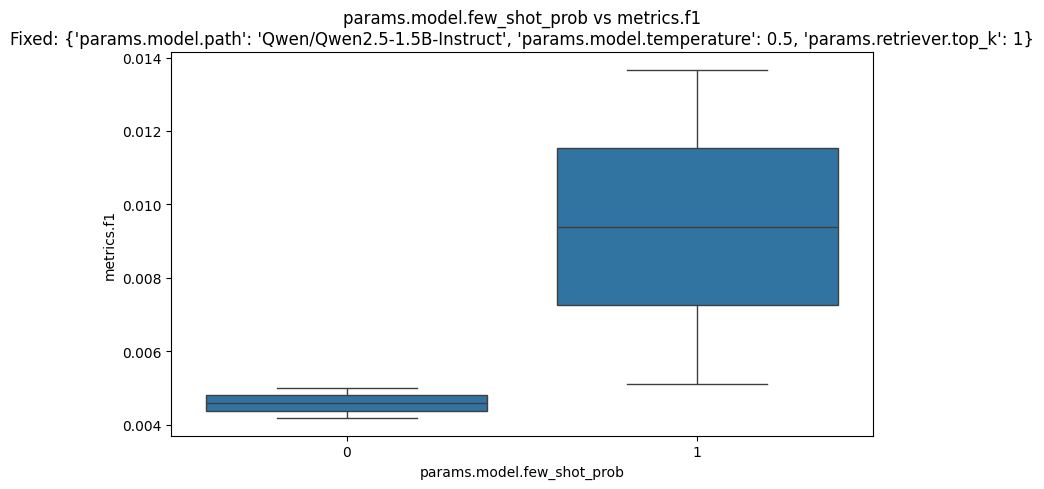

In [10]:
fixed = {
    'params.model.path': 'Qwen/Qwen2.5-1.5B-Instruct',
    'params.model.temperature': 0.5,
    'params.retriever.top_k': 1,
}
plot_param_impact_controlled(
    df, 
    param='params.model.few_shot_prob', 
    metric='metrics.f1', 
    fixed_params=fixed
)

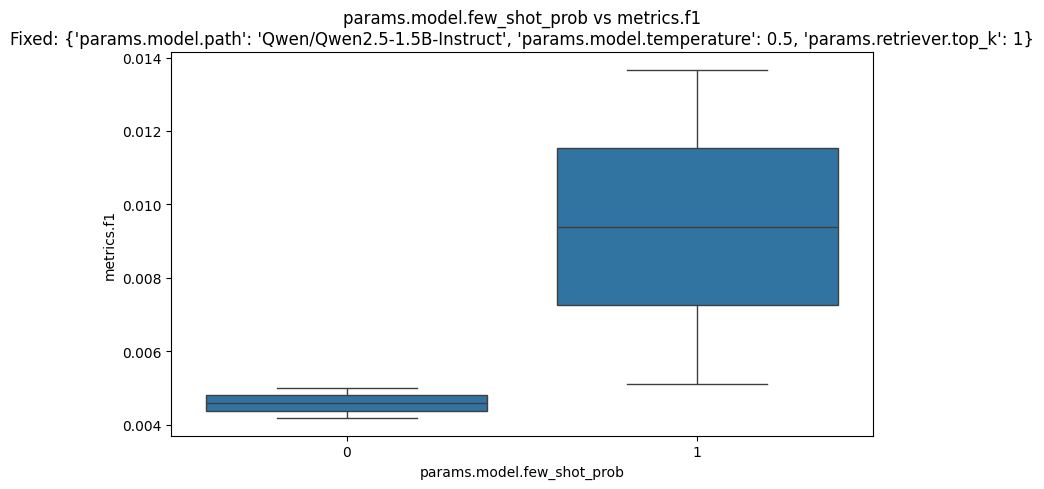

In [11]:
fixed = {
    'params.model.path': 'Qwen/Qwen2.5-1.5B-Instruct',
    'params.model.temperature': 0.5,
    'params.retriever.top_k': 1,
}
plot_param_impact_controlled(
    df, 
    param='params.model.few_shot_prob', 
    metric='metrics.f1', 
    fixed_params=fixed
)

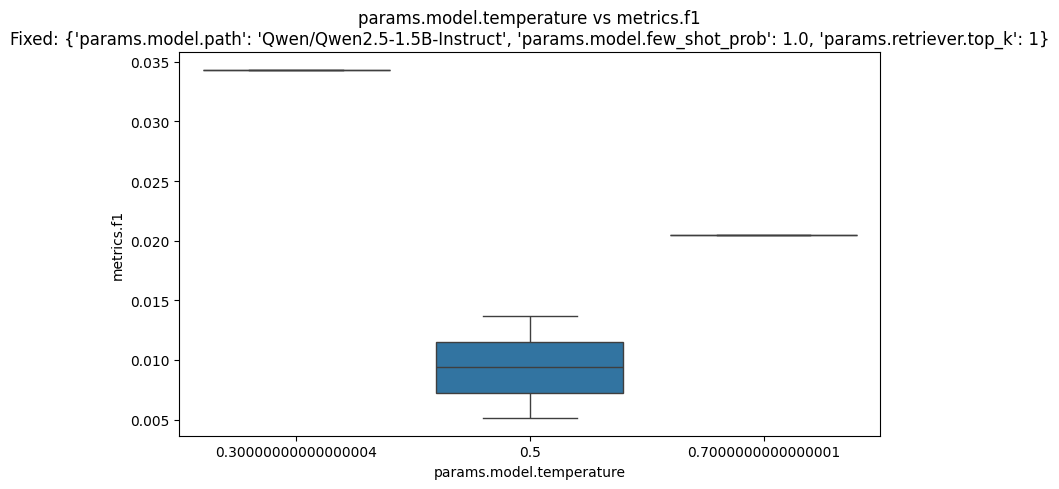

In [12]:
fixed = {
    'params.model.path': 'Qwen/Qwen2.5-1.5B-Instruct',
    'params.model.few_shot_prob': 1.0,
    'params.retriever.top_k': 1,
}
plot_param_impact_controlled(
    df, 
    param='params.model.temperature', 
    metric='metrics.f1', 
    fixed_params=fixed
)

In [13]:
# Calculate average F1 score for each model
best_f1_scores = df.groupby('params.model.path')['metrics.f1'].max().sort_values(ascending=False)
print("Average F1 Scores per Model:\n", best_f1_scores)

# Get the name of the best model
best_model_path = best_f1_scores.idxmax()
print(f"\nBest performing model (based on average F1): {best_model_path}") 

Average F1 Scores per Model:
 params.model.path
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-20250508_213215-merged    0.480336
bdsaglam/Llama-3.1-8B-Instruct-ragent-grpo-musique-merged                                       0.478288
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-400            0.468249
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-2                              0.428296
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-20250427_095331-merged    0.428197
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-1600           0.420847
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-grpo-musique-2-merged          0.415181
/home/baris/repos/verifiers/outputs/Llama-3.1-8B-Instruct-ragent-20250421_000014-1900           0.368820
meta-llama/Llama-3.1-70B-Instruct                                                               0.364412
Qwen/Qw

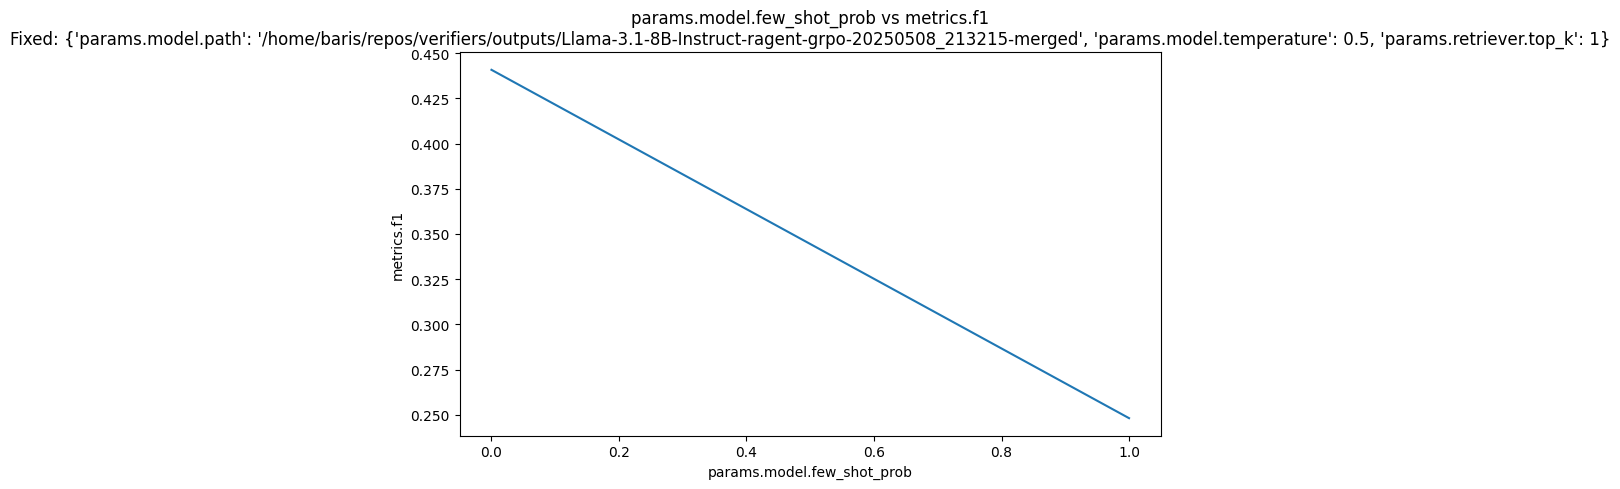

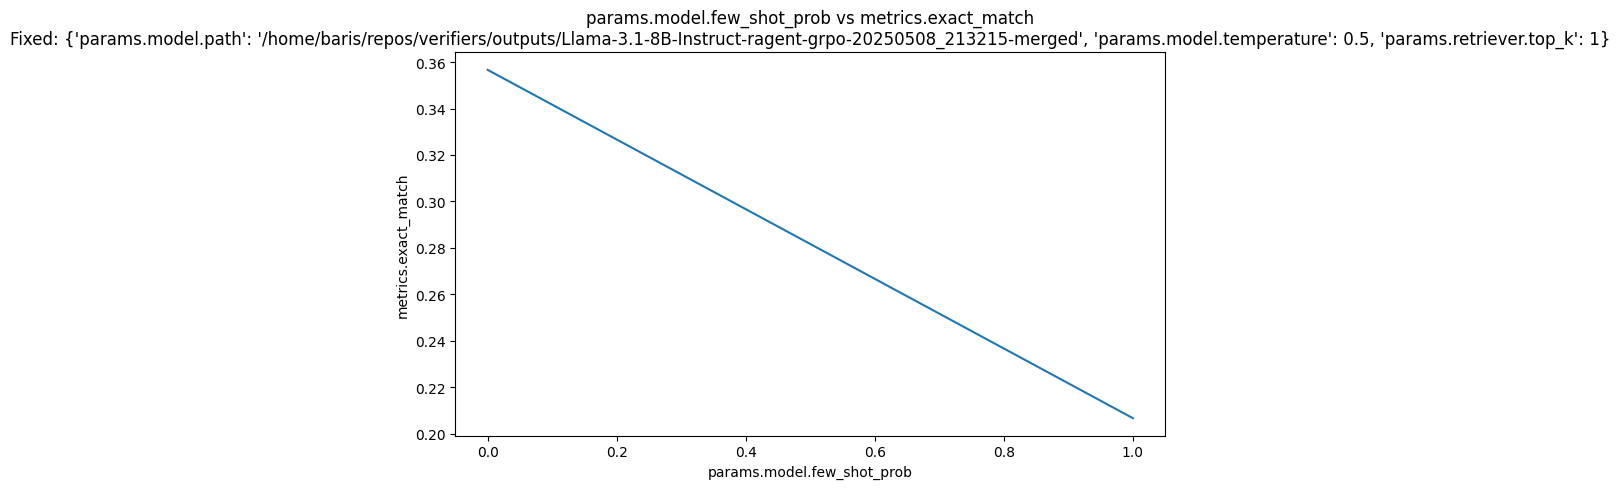

In [14]:
# --- Analyze Few-Shot Impact on Best Model (Fixing Temp & TopK) ---
fixed_best_fs = {
    'params.model.path': best_model_path,
    'params.model.temperature': 0.5,  # Choose a representative temp
    'params.retriever.top_k': 1,      # Choose a representative top_k
}
plot_param_impact_controlled(
    df, 
    param='params.model.few_shot_prob', 
    metric='metrics.f1', 
    fixed_params=fixed_best_fs,
    plot_func=sns.lineplot # Line plot might show trends better
)
plot_param_impact_controlled(
    df, 
    param='params.model.few_shot_prob', 
    metric='metrics.exact_match', # Check other metrics too
    fixed_params=fixed_best_fs,
    plot_func=sns.lineplot
)

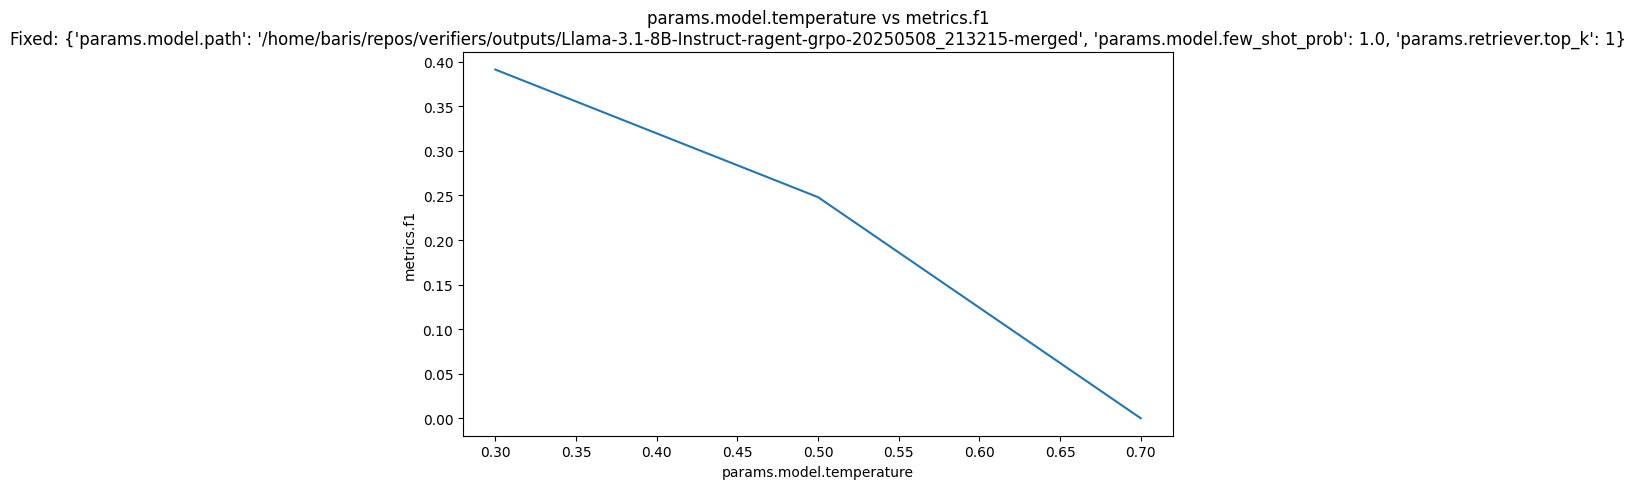

In [ ]:

# --- Analyze Temperature Impact on Best Model (Fixing Few-Shot & TopK) ---
fixed_best_temp = {
    'params.model.path': best_model_path,
    'params.model.few_shot_prob': 1.0, # Choose a representative prob
    'params.retriever.top_k': 1,      # Choose a representative top_k
}
plot_param_impact_controlled(
    df, 
    param='params.model.temperature', 
    metric='metrics.f1', 
    fixed_params=fixed_best_temp,
    plot_func=sns.lineplot
)


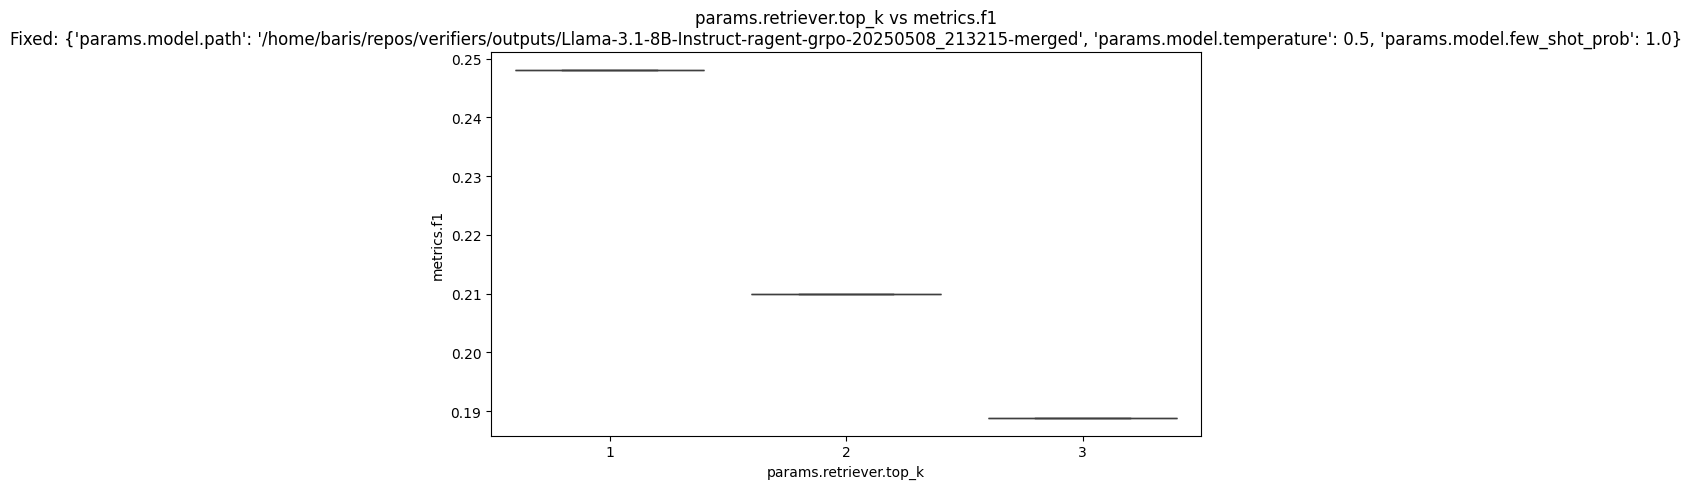

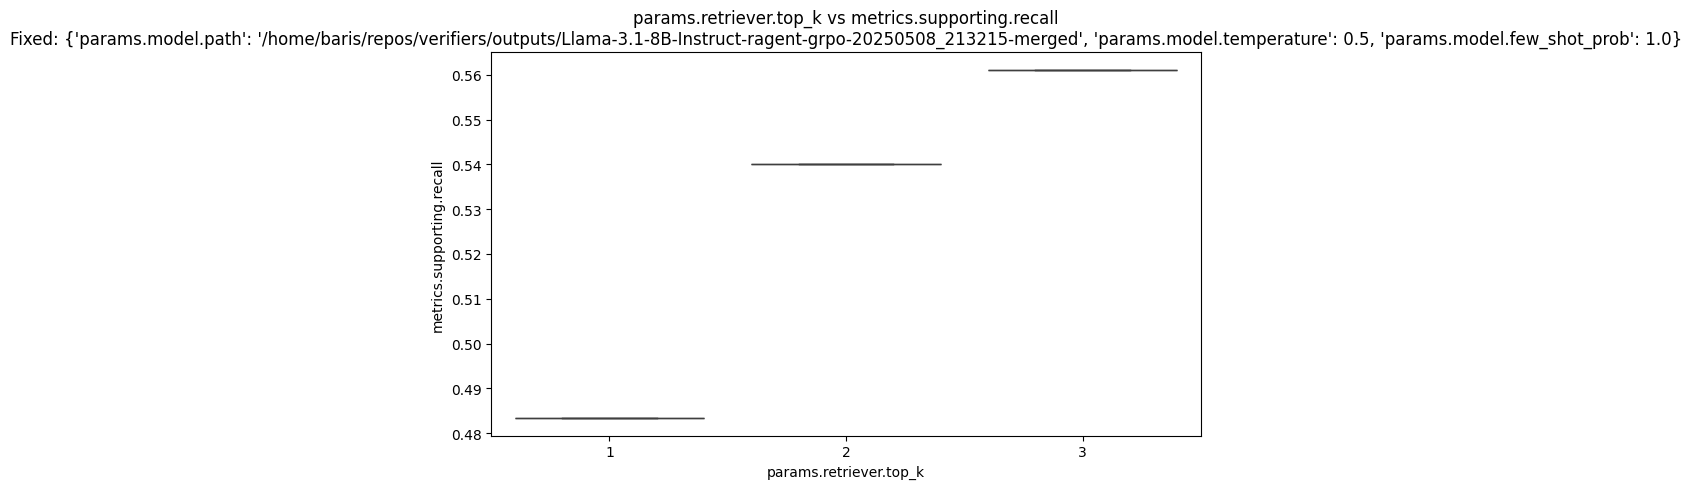

In [16]:
# --- Analyze Top-K Impact on Best Model (Fixing Temp & Few-Shot) ---
fixed_best_topk = {
    'params.model.path': best_model_path,
    'params.model.temperature': 0.5,  # Choose a representative temp
    'params.model.few_shot_prob': 1.0, # Choose a representative prob
}
plot_param_impact_controlled(
    df, 
    param='params.retriever.top_k', 
    metric='metrics.f1', 
    fixed_params=fixed_best_topk,
    plot_func=sns.boxplot # Box plot suitable for discrete top_k
)
plot_param_impact_controlled(
    df, 
    param='params.retriever.top_k', 
    metric='metrics.supporting.recall', # Check recall too
    fixed_params=fixed_best_topk,
    plot_func=sns.boxplot 
)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure filter_by_fixed_params function is defined from previous message

def plot_param_impact_facet(
    df, 
    param, 
    metrics=['metrics.f1'], 
    row_param=None, 
    col_param='params.model.path', 
    n_top_models=4,
    fixed_params={},
    plot_type='line', # 'line' or 'box'
    figsize_per_facet=(4, 3.5) # Control size per subplot
):
    """
    Creates a facet grid to compare parameter impacts across models or other dimensions.
    Focuses on top N models based on average F1 score within the filtered data.
    Ensures models are ordered consistently in each plot (by model size, then name).
    """
    
    # Filter based on fixed_params first
    df_filtered = filter_by_fixed_params(df, fixed_params)
    if df_filtered.empty:
        print(f"No data for the specified fixed parameters: {fixed_params}")
        return

    # Identify top N models from the filtered data
    col_values_to_plot = df_filtered[col_param].unique()
    if col_param == 'params.model.path' and n_top_models is not None:
        # Ensure F1 is available for grouping if sorting by it
        metric_to_sort_by = 'metrics.f1' if 'metrics.f1' in df_filtered.columns else metrics[0] 
        if metric_to_sort_by in df_filtered.columns:
            top_models = df_filtered.groupby(col_param)[metric_to_sort_by].mean().nlargest(n_top_models).index.tolist()
            df_plot = df_filtered[df_filtered[col_param].isin(top_models)].copy()
            col_values_to_plot = top_models
        else:
            print(f"Warning: Cannot sort models by {metric_to_sort_by}, metric not found. Using first {n_top_models} unique models.")
            top_models = df_filtered[col_param].unique()[:n_top_models]
            df_plot = df_filtered[df_filtered[col_param].isin(top_models)].copy()
            col_values_to_plot = top_models

        # Clean model names for display titles if using model paths
        if all('/' in str(p) for p in col_values_to_plot):
            df_plot['col_display'] = df_plot[col_param].apply(lambda x: str(x).split('/')[-1])
            col_param_display = 'col_display'
        else:
            df_plot['col_display'] = df_plot[col_param]
            col_param_display = col_param

        # --- Ensure consistent model order: by model size, then name ---
        # Try to use 'params.model.size' if available, else sort by display name
        if 'params.model.size' in df_plot.columns:
            # Get unique (model_path, model_size, display_name) tuples for ordering
            model_order_df = (
                df_plot[[col_param, 'params.model.size', 'col_display']]
                .drop_duplicates()
                .sort_values(['params.model.size', 'col_display'], ascending=[False, True])
            )
            ordered_col_displays = model_order_df['col_display'].tolist()
        else:
            # Fallback: sort by display name
            ordered_col_displays = sorted(df_plot['col_display'].unique())
    else:
        df_plot = df_filtered.copy()
        df_plot['col_display'] = df_plot[col_param]
        col_param_display = 'col_display'
        ordered_col_displays = sorted(df_plot['col_display'].unique())

    if df_plot.empty:
        print("No data left after filtering for top models/columns.")
        return
        
    num_cols = len(df_plot[col_param_display].unique())
    num_rows = 1 if row_param is None else len(df_plot[row_param].unique())
    
    # Adjust figsize dynamically
    figsize = (figsize_per_facet[0] * num_cols, figsize_per_facet[1] * num_rows * len(metrics))

    for i, metric in enumerate(metrics):
        if plot_type == 'line':
            g = sns.FacetGrid(
                df_plot, 
                col=col_param_display, 
                row=row_param, 
                margin_titles=True, 
                sharey=True, 
                height=figsize_per_facet[1], 
                aspect=figsize_per_facet[0]/figsize_per_facet[1],
                col_order=ordered_col_displays
            )
            g.map(sns.lineplot, param, metric, marker='o', errorbar=('ci', 95))
        elif plot_type == 'box':
            g = sns.FacetGrid(
                df_plot, 
                col=col_param_display, 
                row=row_param, 
                margin_titles=True, 
                sharey=True, 
                height=figsize_per_facet[1], 
                aspect=figsize_per_facet[0]/figsize_per_facet[1],
                col_order=ordered_col_displays
            )
            # Order boxes if param is categorical/discrete
            order = sorted(df_plot[param].unique()) if df_plot[param].nunique() < 10 else None
            g.map(sns.boxplot, param, metric, order=order)
        else:
            print(f"Unsupported plot_type: {plot_type}")
            return

        plot_title = f'{param.split(".")[-1]} vs {metric}'
        if fixed_params:
            fixed_str = ", ".join([f'{k.split(".")[-1]}={v}' for k, v in fixed_params.items()])
            plot_title += f'\n(Fixed: {fixed_str})'
        
        g.fig.suptitle(plot_title, y=1.03)
        g.set_axis_labels(param.split('.')[-1], metric)
        g.set_titles(col_template="{col_name}", row_template="{row_name}")
        g.tick_params(axis='x', rotation=45) # Rotate all x-axis labels
        plt.tight_layout(rect=[0, 0, 1, 0.95 + (0.01 * len(fixed_params))]) # Adjust layout
        plt.show()


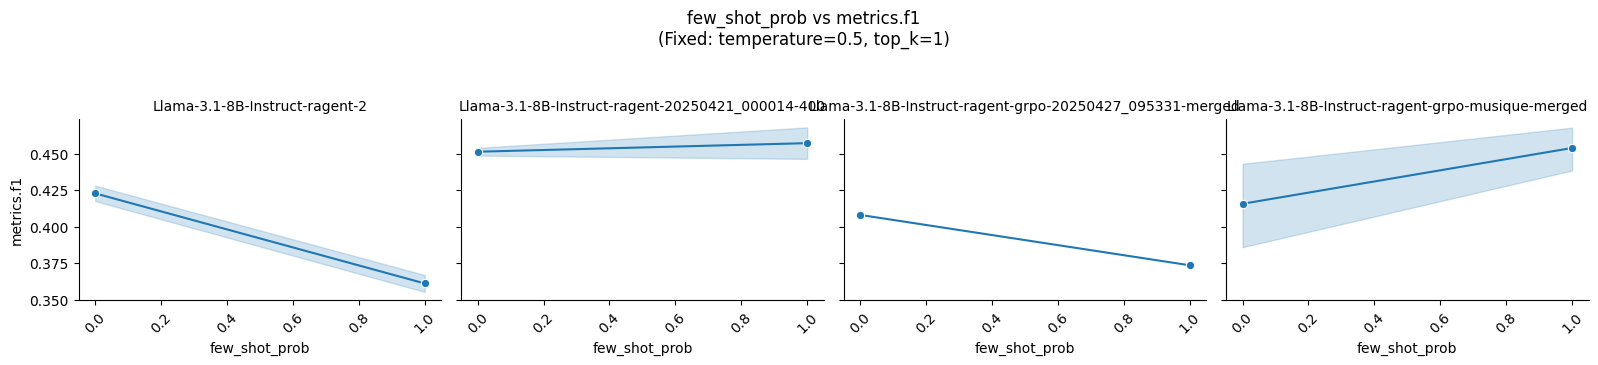

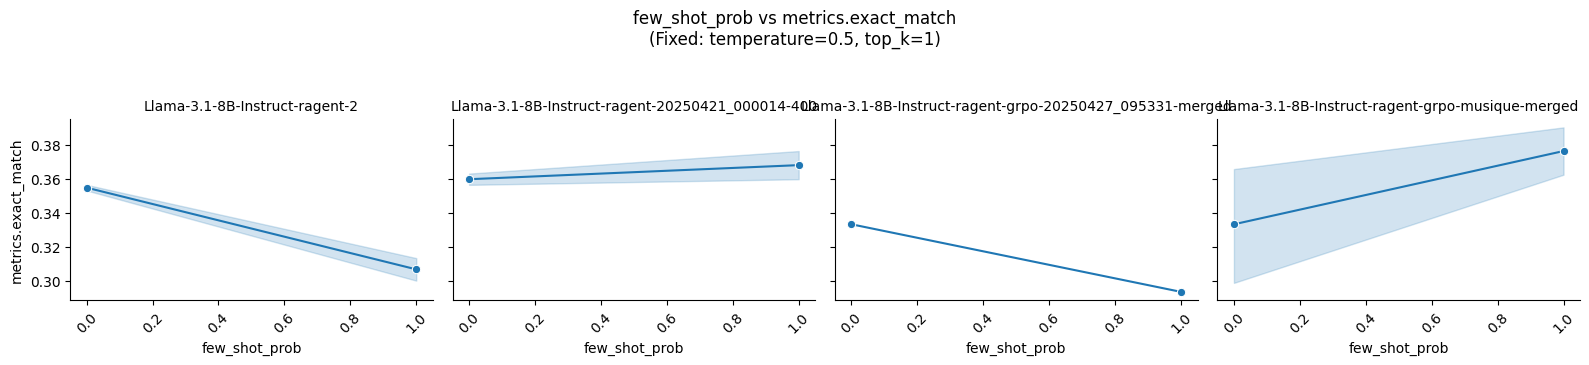

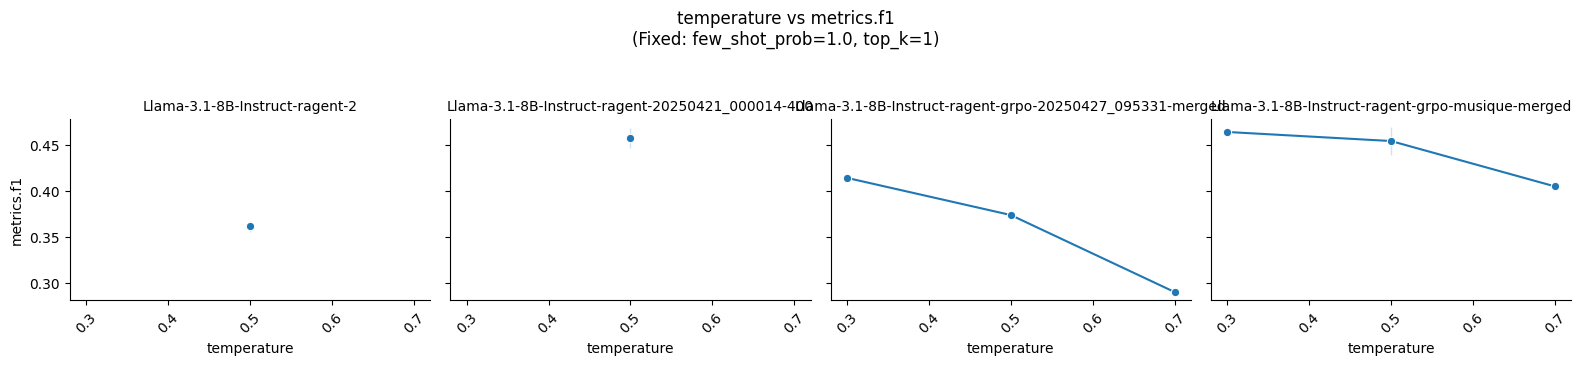

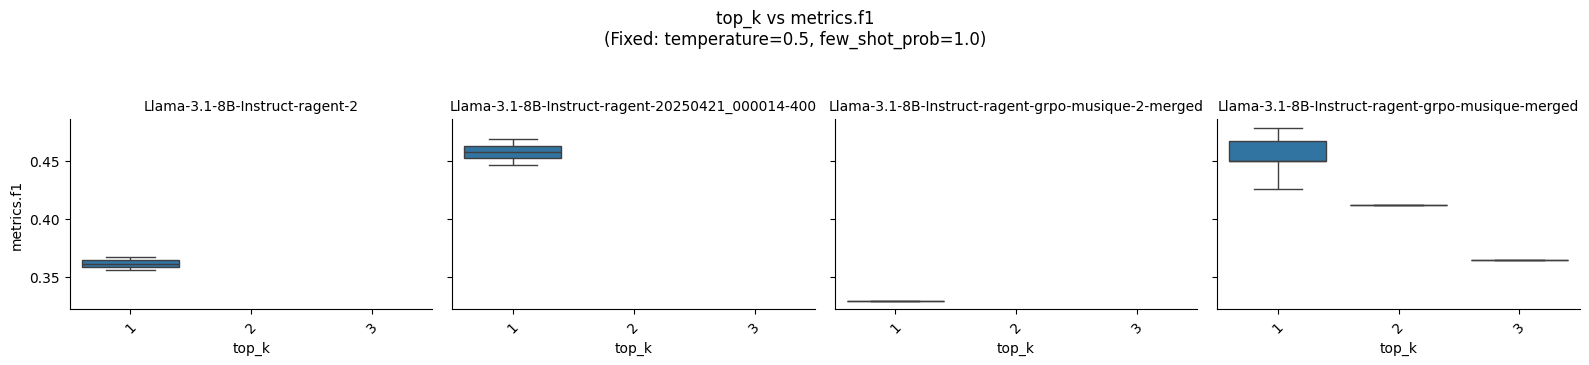

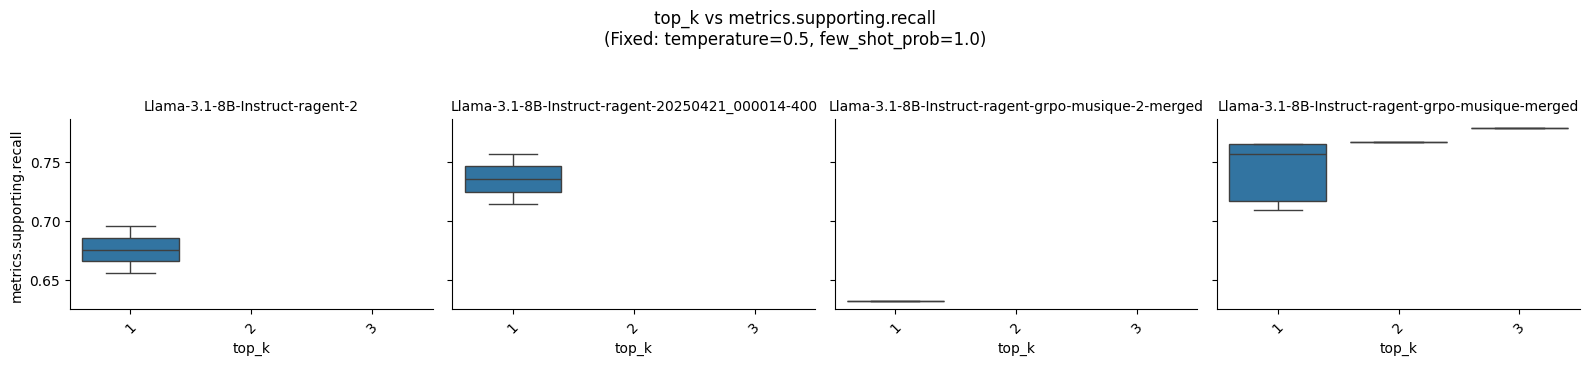

In [18]:
# --- Compare Few-Shot Impact Across Top 4 Models (Fixing Temp & TopK) ---
fixed_facet_fs = {
    'params.model.temperature': 0.5,
    'params.retriever.top_k': 1,
}
plot_param_impact_facet(
    df, 
    param='params.model.few_shot_prob', 
    metrics=['metrics.f1', 'metrics.exact_match'], # Plot multiple metrics
    col_param='params.model.path', 
    n_top_models=4,
    fixed_params=fixed_facet_fs,
    plot_type='line' 
)

# --- Compare Temperature Impact Across Top 4 Models (Fixing Few-Shot & TopK) ---
fixed_facet_temp = {
    'params.model.few_shot_prob': 1.0,
    'params.retriever.top_k': 1,
}
plot_param_impact_facet(
    df, 
    param='params.model.temperature', 
    metrics=['metrics.f1'], 
    col_param='params.model.path', 
    n_top_models=4,
    fixed_params=fixed_facet_temp,
    plot_type='line' 
)

# --- Compare Top-K Impact Across Top 4 Models (Fixing Temp & Few-Shot) ---
fixed_facet_topk = {
    'params.model.temperature': 0.5,
    'params.model.few_shot_prob': 1.0,
}
plot_param_impact_facet(
    df, 
    param='params.retriever.top_k', 
    metrics=['metrics.f1', 'metrics.supporting.recall'], 
    col_param='params.model.path', 
    n_top_models=4,
    fixed_params=fixed_facet_topk,
    plot_type='box' # Box plot suitable for discrete top_k
)

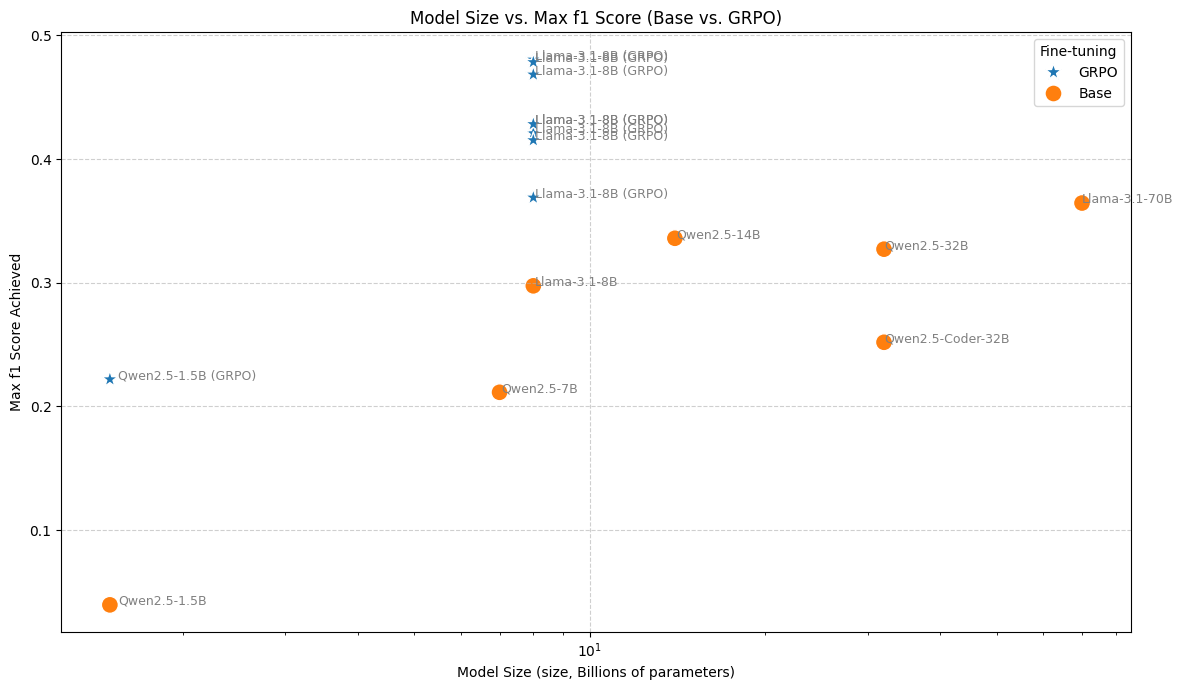

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_size_vs_performance_with_finetuning(df, metric='metrics.f1', size_param='params.model.size', figsize=(12, 7)):
    """
    Plots model size vs. performance (max metric), using different markers 
    for base models and GRPO fine-tuned models. Includes all models found.
    
    Assumes 'params.model.path' uniquely identifies a model configuration,
    'params.fine_tuning' indicates 'GRPO' or is None/NaN for base models,
    and 'params.model.size' contains the model size.
    """
    
    required_cols = ['params.model.path', 'params.fine_tuning', size_param, metric]
    if not all(col in df.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df.columns]
        print(f"Missing required columns: {missing}")
        print(f"Available columns: {df.columns.tolist()}")
        # Attempt to infer size if 'params.model.size' is missing but path contains size info (e.g., '1.5B', '7B')
        if size_param == 'params.model.size' and size_param not in df.columns and 'params.model.path' in df.columns:
             print(f"Attempting to infer size from '{'params.model.path'}'...")
             try:
                 # Basic regex to extract numbers followed by B or M (for Billions/Millions)
                 df[size_param] = df['params.model.path'].str.extract(r'(\d+(\.\d+)?)(B|M)', expand=True)[0].astype(float)
                 # Convert M to B if necessary (assuming M means Millions)
                 is_millions = df['params.model.path'].str.contains(r'\d+M', na=False)
                 df.loc[is_millions, size_param] = df.loc[is_millions, size_param] / 1000.0
                 print(f"Inferred sizes (in Billions): {df[size_param].unique()}")
                 if df[size_param].isnull().any():
                      print("Warning: Could not infer size for all models.")
                 required_cols.remove(size_param) # No longer strictly required if inferred
             except Exception as e:
                 print(f"Error inferring size: {e}. Cannot proceed without '{size_param}'.")
                 return
        elif size_param not in df.columns:
             print(f"Cannot proceed without '{size_param}' column.")
             return


    # 1. Find the maximum metric score for each unique model configuration (path)
    #    Make sure to keep the size and fine-tuning info associated with that max score.
    idx_max = df.groupby('params.model.path')[metric].idxmax()
    df_max_scores = df.loc[idx_max].copy() # Use .copy()

    # 2. Handle NaNs in fine_tuning and ensure size is numeric
    if not pd.api.types.is_numeric_dtype(df_max_scores[size_param]):
        print(f"Warning: '{size_param}' column is not numeric. Attempting conversion...")
        try:
            df_max_scores[size_param] = pd.to_numeric(df_max_scores[size_param], errors='coerce')
            if df_max_scores[size_param].isnull().any():
                print(f"Warning: Some values in '{size_param}' could not be converted to numeric and were set to NaN.")
                df_max_scores.dropna(subset=[size_param], inplace=True) # Drop rows where size is NaN after conversion
        except Exception as e:
            print(f"Error converting '{size_param}' to numeric: {e}. Cannot proceed.")
            return
            
    if df_max_scores.empty:
        print("No data remaining after processing max scores and size.")
        return

    # 3. Plotting using scatterplot
    plt.figure(figsize=figsize)
    ax = sns.scatterplot(
        data=df_max_scores, 
        x=size_param, 
        y=metric, 
        style='params.fine_tuning',  # Use style for different markers
        hue='params.fine_tuning',    # Use hue for different colors
        markers={'Base': 'o', 'GRPO': '*'},  # Define markers: circle for Base, star for GRPO
        s=150 # Increase marker size
    )
    
    # Optional: Add text labels for each point (can be cluttered)
    for i in range(df_max_scores.shape[0]):
        model_label = df_max_scores['params.model.base'].iloc[i]
        if df_max_scores['params.fine_tuning'].iloc[i] == 'GRPO':
            model_label = model_label + ' (GRPO)'
        plt.text(x=df_max_scores[size_param].iloc[i] + 0.05, # Offset slightly
                 y=df_max_scores[metric].iloc[i], 
                 s=model_label, 
                 fontdict=dict(color='grey',size=9))
    
    ax.set_xscale('log')
    plt.title(f'Model Size vs. Max {metric.split(".")[-1]} Score (Base vs. GRPO)')
    plt.xlabel(f'Model Size ({size_param.split(".")[-1]}, Billions of parameters)')
    plt.ylabel(f'Max {metric.split(".")[-1]} Score Achieved')
    plt.legend(title='Fine-tuning')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# --- Snippet to run the visualization ---
# Assuming 'params.model.size' column exists and contains size in billions (e.g., 1.5, 7, 8, 14, 32)
plot_size_vs_performance_with_finetuning(df, metric='metrics.f1', size_param='params.model.size') 